<a href="https://colab.research.google.com/github/loxalibre/Aprendizaje-Autom-tico/blob/main/redes_elasticas_Regresion_polinomicas_no_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Universidad Nacional de Loja logo" height="140px" src="https://pbs.twimg.com/profile_images/1049739254631452673/EeXZTWRj_400x400.jpg" align="left" hspace="10px" vspace="0px"></p>

<h1> Universidad Nacional de Loja</h1>

---


Carrera de Ingeniería en Sistemas (mayo-septiembre 2021)

---
Inteligencia Artificial

---

Estudiante: Maria Encalada

---

Créditos: Tomado de: https://colab.research.google.com/github/jdamaster/machineLearningDiplomat/blob/master/s07_SVM__redes_elasticas_Regresion_polinomicas_no_lineales.ipynb

# Contenido 

- <a href="#met">1. Métricas</a><br>
- <a href="#regpol">2. Regresión polinómica y no lineal</a><br>
- <a href="#redela">3. Redes elásticas</a><br>
- <a href="#svm">4. Máquinas de soporte vectorial</a><br>


<p><a name="met"></a></p>

# 1. Métricas

[[Contenidos]](#contents)

En la sesión anterior estudiamos un modelo de regresión simple, por medio del cual se hace una predicción calculando una suma ponderada de las características de entrada, más una constante llamada término de sesgo (también llamado intercepto).

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Primero necesitamos de una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada $\hat{y}$ (o el hiperplano) a los puntos reales. El entrenamiento del modelo será entonces encontrar los valores de $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. Apliquémoslas al modelo lineal simple estudiado en la sesión anterior:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'https://raw.githubusercontent.com/loxalibre/Aprendizaje-Autom-tico/main/automobileEDA.csv'
df = pd.read_csv(archivo)

#separemos nuestros datos en características y etiquetas
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Obtengamos ahora los datos predichos por el modelo y calculemos las métricas

In [ ]:
y_pred = linear.predict(X_test)

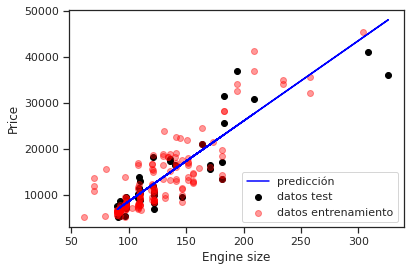

In [ ]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print('Error medio absoluto (MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio (MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error medio absoluto (MAE):  3017.348816752345
Error cuadrático medio (MSE):  18576671.47536118
Raíz del error cuadrático medio (RMSE):  4310.066295935734


Y calculemos el coeficiente de correlación $R^2$

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7735450111026794


Comprobemos además si los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo. El siguiente se conoce como un *histograma de residuos*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


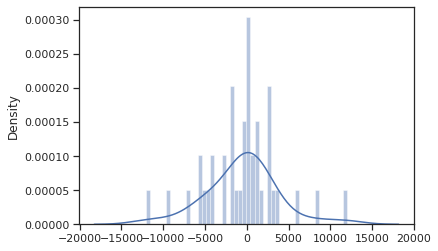

In [ ]:
sns.distplot((y_test - y_pred), bins = 50)
plt.show()

Una vez que hemos entrenado el modelo de regresión lineal las predicciones se obtienen rápidamente. La complejidad computacional es lineal con respecto a la cantidad de instancias y características sobre las que desea hacer predicciones. En otras palabras, hacer predicciones con el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo de computo. Existen diferentes formas de entrenar un modelo de regresión lineal, más adecuado para casos en los que hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en memoria.





# Gradiente descendente

Existen formas diferentes de entrenar un modelo de regresión lineal, más adecuado para casos en los que, como mencionamos, hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en la memoria. Un algoritmo con estas características es el del gradiente descendente estocástico (SGD).

La idea general del algoritmo de gradiente descendente es ajustar los parámetros $w_i$ de forma iterativa para minimizar la función de costo. Básicamente, este algoritmo mide el gradiente local de la función de costo con respecto a los parámetros $w_i$, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero se ha alcanzado un mínimo.

<img height="300px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png" alt="Drawing" style="width: 200px;"/>

Un parámetro importante es el tamaño de los pasos, determinado por el hiperparámetro $\eta$, conocido como *tasa de aprendizaje*. Si este es muy pequeño, el algoritmo tomará mucho tiempo en converger al mínimo. Por el contrario si este es muy grande, se corre el peligro de alejarse mucho más del mínimo.


<img height="240px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0407.png" alt="Drawing" style="width: 400px;"/>



Concretamente, el SGD selecciona una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basado solo en esa instancia. Esto es lo que hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos para manipular en cada iteración. 

La clase `LinearRegression` de sklearn que hemos utilizado no utiliza este algoritmo. Para implementar una regresión lineal usando SGD con Scikit-Learn, se puede usar la clase `SGDRegressor`, que por defecto optimiza la función de costo MSE. Vamos a generar algunos datos de aspecto lineal para probar probar el modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
w0, w1 = sgd_reg.intercept_, sgd_reg.coef_

print(w0,w1)

[4.28614196] [2.81898901]


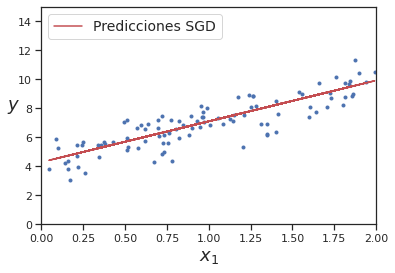

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, [w0 + w1 * x for x in X], "r-", label="Predicciones SGD")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

<p><a name="regpol"></a></p>

# 2. Regresión polinómica

[[Contenidos]](#contents)

**Regresión Polinómica**

Hasta ahora nos hemos centrado en la creación de modelos lineales simples y multivariados en donde la relación entre la/las variable/variables predictora/predictoras y la variable blanco corrsponde a una relación lineal. 

No obstante, en algunas ocasiones las tendencias de los datos presentan un comportamiento curvo. En estos caso debemos buscar otro modelo para representar los datos, como es el método de **regresión polinómica**. Dentro de la regreción polinómica, tenemos varias tipos de regresiones dependiendo del grado del polinómio que usemos:

* Cuadrática: Si el polinomio que usamos es grado dos.
* Cúbica: Si el polinomio que usamos es grado tres.
* Cuártica: Si el polinomio que usamos es grado cuatro.
* etc

Podemos llamar a todos estos casos regresiones polinómicas, ya que la relación entre la variable independiente $x$ y la variable dependiente  $y$ se modela mediante un polinomio de grado n en la variable $x$:

\begin{equation}
\hat{y}=w_0x^0+w_1x^1+w_2x^2\cdots w_nx^x = \sum_{i=0}^nw_ix^i
\end{equation}

En donde los $w$'s representan los parámetros del ajuste o la regresión 

**¿Cómo podemos abordar una regresión polinómica?**

Existe un "truco" que nos permite convertir una regresión polinómica en una regresión lineal múltiple. Si definimos:

* $x_1=x$
* $x_2=x^2$
* $x_3=x^3$
* $\cdot$
* $\cdot$
* $\cdot$
* $x_n=x^n$

podemos tratar el problema como una regresión lineal múltiple de la forma

\begin{equation}
\hat{y}=w_0x_0+w_1x_1+w_2x_2\cdots w_nx_x = \sum_{i=0}^nw_ix_i
\end{equation}

Por ende, la regresión polinómica se considera un caso especial de la regresión lineal múltiple, de tal forma que se pueden usar los mismos mecanismos que una regresión lineal para resolver el problema del modelado de los datos.

**Base de datos**

A continuación, tomaremos un conjunto de datos correspondientes a la clasificaciones de consumo de combustibles específicas de los modelos de carros y las emisiones estimadas de dióxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada. Para mayor información puede consultar el [link](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64). La base de datos contienen características como:

- **MODELYEAR** Año del vehiculo.
- **MAKE** Marca o fabricante
- **MODEL** Modelo del vehiculo.
- **VEHICLE CLASS** Clase del vehiculo
- **ENGINE SIZE** Tamaño del motor.
- **CYLINDERS** Número de cilindros
- **TRANSMISSION** Tipo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** Consumo en ciudad en litros por cada 100 km.
- **FUEL CONSUMPTION in HWY (L/100 km)** Consumo en autopista en litros por cada 100 km.
- **FUEL CONSUMPTION COMB (L/100 km)** Consumo combinado en litros por cada 100 km.
- **CO2 EMISSIONS (g/km)** Emisión en gramos por kilómetros.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Lectura de los datos
df = pd.read_csv("https://raw.githubusercontent.com/loxalibre/Aprendizaje-Autom-tico/main/FuelConsumptionCo2.csv")

# Inspección visual del dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Escojamos algunas características que estén relacionadas con la emisión de dioxido de carbono. Veamos la matriz de dispersión

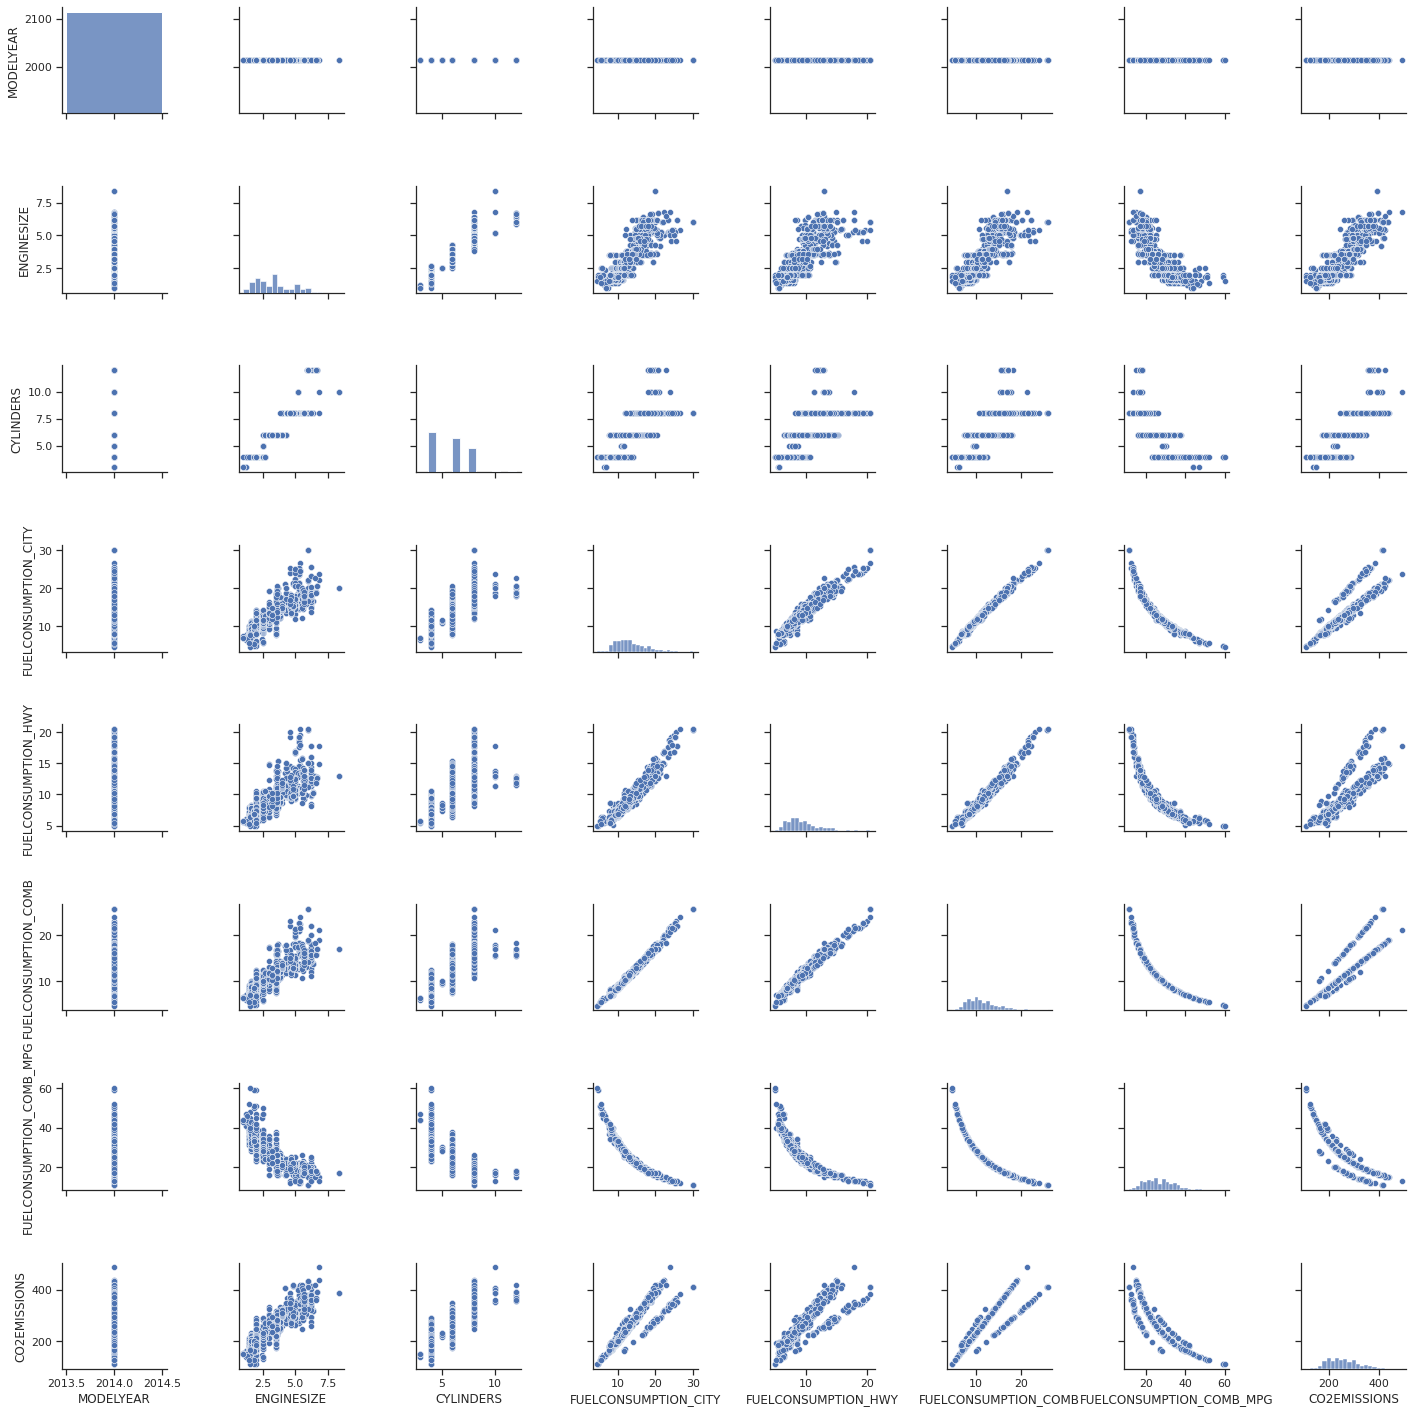

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

Intentemos construir un modelo, mediante un ajuste polinomial, de la emisión de dióxido de carbono en función de la característica "FUELCONSUMPTION_COMB_MPG"

In [ ]:
# Escogemos nuestra variable predictora como Engine Size:
X=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)

# Escogemos nuestra variable objetivo como las emisiones de CO2:
y=df['CO2EMISSIONS'].values.reshape(-1,1)

**Train and test dataframe**

Creemos ahora los grupos de train y test con los cuales entrenaremos y probaremos el modelo, respectivamente. Recordemos que este paso podemos hacerlo mediante la función `train_test_split` de la librería `sklearn.model_selection`:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(853, 1) (853, 1)
(214, 1) (214, 1)


<h2 id="evaluation">Regresión polinómica de los datos:</h2>

Intentemos crear un modelo cuadrático de la emisión de dióxido de carbono en función del tamaño del motor:

$\hat{y} = w_o + w_1 x + w_2 x^2$

En donde x reprenta la variable independiente 'FUELCONSUMPTION_COMB_MPG'. Para resolver este problema usamos la siguiente función:


__PloynomialFeatures()__ es una función de la  librería Scikit-learn, la cual emplea nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz compuesta de todas las combinaciones polinomiales de las características de grado menor o igual especificado en `degree`. Por ejemplo, suponiendo que el conjunto inicial solo tienen una característica, _FUELCONSUMPTION_COMB_MPG_, entonces, si especificamos `degree=2`, se generarán tres caracteristicas dadas por `degree=0`, `degree=1` y `degree=2`: 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       ...,
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 1.400e+01, 1.960e+02]])

El método **fit_transform** tomo los valores de x y crea una lista, elevando los valores en potencias enteras desde 0 hasta 2.

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

De lo anterior se puede notar que se tiene la apariencia de un análisis de regresión multiple, lo que corrobora que la regresión polinómica representa un caso especial de la regresión lineal.

A partir de este punto, podemos tratar nuestro problema como un caso de regresión lineal, de tal forma que podemos usar los mismos mecanismos que se emplean para resolver este tipo de problemas. Podemos usar, por ejemplo, la función  __LinearRegression()__ para solucionar nuestro problema:

In [ ]:
clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.         -15.09886556   0.12927416]]
Intercept:  [557.75050432]


En la celda anterior, __Coefficient__ e __Intercept__ corresponden a los parámetros del ajuste de la linea curva. 

Teniendo en cuenta que estamos tratando con una regresión lineal múltiple con 3 parámetros, los cuales representan la intersección y los coeficientes del hiperplano, sklearn los calcula a partir del nuevo conjunto de características. Veamos como luce el ajuste realizado sobre los datos de "COEMISSION" vs "FUELCONSUMPTION_COMB_MPG":

Text(0, 0.5, 'Emission')

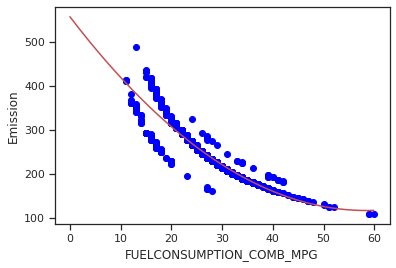

In [ ]:
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluación</h2>

In [ ]:
#con la regresion lineal
linear = LinearRegression()
linear.fit(x_train,y_train)

y_pred = linear.predict(x_test)

print('Error medio absoluto (MAE): %.3f '% metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio (MSE): %.3f'% metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio (RMSE): %.3f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R ajustado (R²): %.3f'% metrics.r2_score(y_test, y_pred))

Error medio absoluto (MAE): 17.371 
Error cuadrático medio (MSE): 709.475
Raíz del error cuadrático medio (RMSE): 26.636
R ajustado (R²): 0.825


In [ ]:
#con la regresion polinómica
from sklearn import metrics
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
print('MSE: %.3f' % metrics.mean_squared_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2: %.3f'% metrics.r2_score(test_y_, y_test))

MAE: 14.206
MSE: 594.293
RMSE: 24.378
R2: 0.831


# Modelos no lineales

Como bien sabemos, si los datos no presentan una tendencia lineal entre las características y las variables objetivo, debemos buscar ajustes a funciones no lineales para la construcción de modelos. Veamos algunas funciones de uso comun para el ajuste de modelos y un ejemplo práctico del crecimiento del producto interno bruto chino.

Las regresiones no lineales representan una relación entre variabres independientes $x$'s y una variable dependiente $y$, lo que resulta en un modelado mediante una función no lieal de los datos. En principio, cualquier relación que no es lineal, puede representarce mediante un polinomio de grado $k$. Por ejemplo: 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Además, las funciones no lineales pueden tener elementos exponenciales, logarítmicos, fracciones, entre otros. Por 
ejemplo, una función de la forma:

$$ y = \log(a x^5 + b x^3 + c x + d)$$

## Función exponencial

Una función exponencial de base c, se define como 

$Y = a + b c^X$

en donde $b\neq0$, $c > 0$ , $c\neq1$, y la X es un número real. La base, $c$, es una constante y el exponente, $X$, es una variable. Un ejemplo gráfico de la función se presenta a continuación:

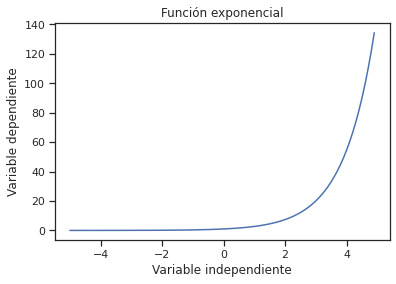

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.title('Función exponencial')
plt.show()

## Función logarítmica

La función logarítmica es la función inversa de la función exponecial, y se representa como:

\begin{equation}
y = \log(X)
\end{equation}

Una representación gráfica de esta función se muestra a continuación:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


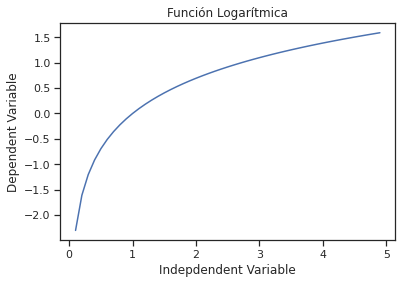

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Función Logarítmica')
plt.show()

## Función sigmoide/logística

La función sigmoide tiene la forma 

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

Y veremos, más adelante, en este curso, una aplicación en la la regresión logística. Una representación gráfica de la función se presenta a continuación:

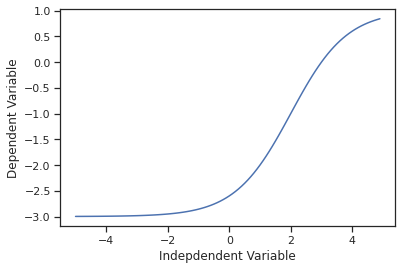

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Ejemplo de regresión no lineal:

Intentemos encontra un modelo no lineal para representar los datos del producto interno bruto de China, entre los años 1960 a 2014. El dataset se presenta a continuación:

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/loxalibre/Aprendizaje-Autom-tico/main/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Gráfica del dataset ###

Veamos como luce el dataset:

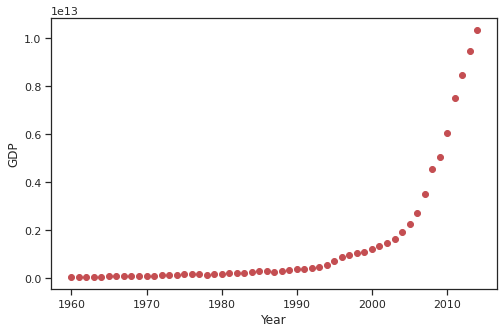

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Esta gráfica parece seguir un comportamiente logístico o exponencial. El crecimiento lento del PIB empieza alrededor del año 1995, y a partir del año 2005 empieza a ser significativo, para luego caer muy poco alrededor del 2010. 

### Determinación del modelo ###

De una inspección inical, podemos determinar que una aproximación logística podría ser adecuada, ya que empieza a crecer lentamente, y aumenta a mitad de camino, para desacelerarse un poco al final. Veamos la siguiente función:

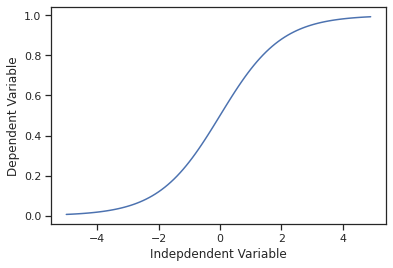

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

De la ecuación de la función logística:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

Tenemos que

$\beta_1$: contrala la inclinación de la curva,

$\beta_2$: proyecta la curva en x.

### Construcción del modelo###

Construyamos nuestro modelo de regresión e inicialicemos los parámetros:

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Veamos un ajuste preliminar "a  mano" de una función sigmoide a los datos

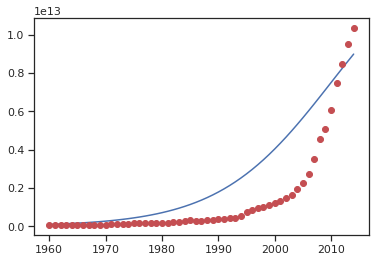

In [ ]:
beta_1 = 0.10
beta_2 = 2010.0

#logistica
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot predicción inicial
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

El objetivo en este modelo es encontrar los parámetros que mejor ajustan la curva a los datos. Procedamos a normalizarlos:

In [ ]:
# normalicemos los datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Usemos el método __curve_fit__ `scipy`, que usa un ajuste de mínimos cuadrados no lineal para ajustar nuesta función sigmoide a los datos. El algoritmo ajusta iterativamente los parámetros, de tal forma que la suma de los residuos cuadrados $sig(x_{data}, *popt) - y_{data}$ se minimiza.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimamos los parámetros
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


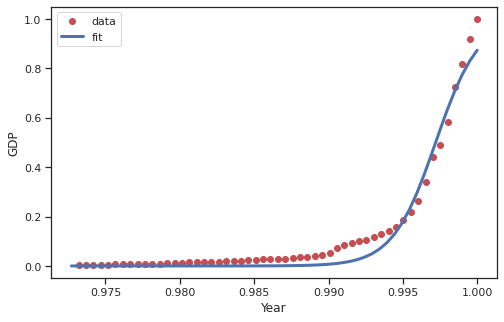

In [ ]:
# Visualización del modelo
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Problema:
Evalue la precisión del modelo creado anteriormente.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

#Reshape data
X=xdata.reshape(-1,1)
y=ydata.reshape(-1,1)

#Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.2, random_state=1)

# crear el modelo
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# predicciones sobre el dataset de test
y_hat = sigmoid(x_test, *popt)

# Evaluacion
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )
--->

<p><a name="redela"></a></p>

# 3. Redes elásticas

Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que: 
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [ ]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor. 

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/loxalibre/Aprendizaje-Autom-tico/main/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
elastic = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

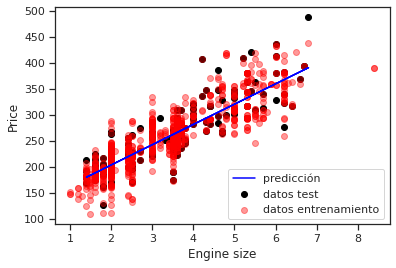

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

MAE:  21.996655219235205
MSE:  898.3256895519332
RMSE:  29.97208183546704
R2:  0.7597831059324895


De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.

<p><a name="svm"></a></p>

# 4. Máquinas de Soporte Vectorial (Support Vector Machine SVM)


SVM son algoritmos de Machine Learning desarrollados por  Vladimir Vapnik y su equipo en los laboratorios AT&T. Estos algoritmnos sirven tanto para solucionar problemas de clasificación como de regresión. 



## Intuición inicial

Supogamos que tenemos un dataset con dos características y  queremos clasificar con una línea recta (hiperplano en el caso de mas dimensiones) a que grupo (rojos o azules) corresponde cada uno. 

<p><img height="230px" src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"  hspace="10px" vspace="0px">
  <img height="230px" src="https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png"  hspace="10px" vspace="0px"></p>



En la figura de la izquierda, podemos ver que tenemos "infinitas" rectas que sirven para clasificar los dos grupos. En SVM escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que están mas cerca de la frontera (línea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la línea de frontera o fuera de ella. En la figura de la derecha son datos que aparecen con el color relleno.  

## Regresión

Los regresores basado en máquinas de soporte vectorial se suele denota como SVR (Support Vector Regressor)

### SVR Lineal

En este caso, la idea es seleccionar el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. Ahora no disponemos de clases
para separar. La idea se basa en considerar una distancia margen ε, de modo que esperamos que todas las instancias se encuentren en una banda o tubo entorno a nuestro hiperplano, es decir, que disten una cantidad menor de ε del hiperplano. A
la hora de definir el hiperplano sólo se consideran las instancias que disten más de ε de nuestro hiperplano. En este caso esas instancias serán los considerados como
vectores soporte.


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_2.png"  align="center" vspace="0px">



La constante C > 0 determina el equilibrio entre la regularidad de la predicción hecha por el hiperplano y la cuantía
hasta la cual toleramos desviaciones mayores que ε. Un valor muy grande de la constante C, en el caso límite (C → ∞)
estaríamos considerando que el conjunto está perfectamente representado por
nuestro hiperplano predictor (ξi → 0). Por contra, un número demasiado pequeño
para C permitiría valores de ξi elevados, es decir, estaríamos admitiendo un número
muy elevado de ejemplos mal representados.

In [ ]:
import sklearn.svm as svm  
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/loxalibre/Aprendizaje-Autom-tico/main/FuelConsumptionCo2.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

Hagamos un primer ajuste lineal. En la matriz de dispersión vimos que existe una relación lineal entre la emisión de CO2 y el tamaño del motor:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


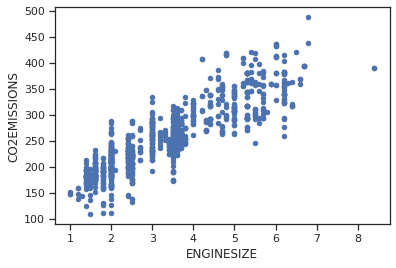

In [ ]:
df.plot(x='ENGINESIZE', y='CO2EMISSIONS',kind='scatter')

In [ ]:
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y)

estimator=svm.LinearSVR()
estimator.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
print('R2-train: ', estimator.score(X_train, y_train))
print('R2-test: ', estimator.score(X_test, y_test))

R2-train:  0.7357341190542666
R2-test:  0.7732795970353173


In [ ]:
y_pred = estimator.predict(X_test)

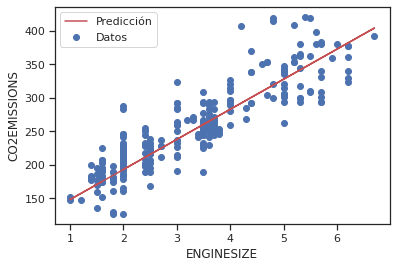

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.plot(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

Con SVR se pueden hacer regresiones multilineales. 

In [ ]:
X = df[['ENGINESIZE','FUELCONSUMPTION_CITY','CYLINDERS']]
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y)

estimator=svm.LinearSVR()
estimator.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test: ', estimator.score(X_test, y_test))

R2_train:  0.7323109264471015
R2_test:  0.783964287203907


In [ ]:
y_pred=estimator.predict(X_test)

Cuando el número de caracteríticas es mayor a dos y no se puede visualizar el resultado de la predicción, podemos graficar los resultados de los datos de prueba con los obtenidos a partir de la predicción. La interpretación de esta gráfica se puede entender como que una buena predicción se da para aquellos que se encuentren cerca de un línea con pendiente 1.

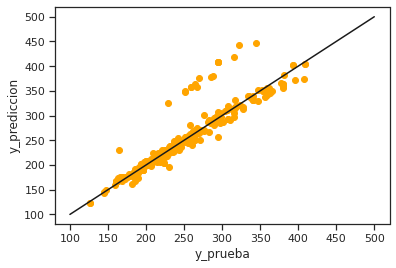

In [ ]:
plt.scatter(y_test,y_pred,color='orange')

plt.plot(np.arange(100,600,100),np.arange(100,600,100), 'k')
plt.xlabel('y_prueba')
plt.ylabel('y_prediccion')
plt.show()

### SVR con kernel

Para el caso en el que la función que se desea ajustar no puede ser ajustada con una recta, el método que se utiliza es mapear los puntos a una mayor dimensionalidad en la que si se pueda hacer el ajuste lineal y luego la solución dada se mapea de regreso al espacio original. 


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_5.png"  align="center" vspace="0px">



La posibles funciones de Kernel integrados en scikitlearn son: 'linear', 'poly', 'rbf', 'sigmoid'

Analicemos el caso de dos variables que es posible ver que no tienen una dependencia lineal, como FUELCONSUMPTION_COMB_MPG, FUELCONSUMPTION_CITY. Observe los resultados que se obtienen usando diferentes kernel.

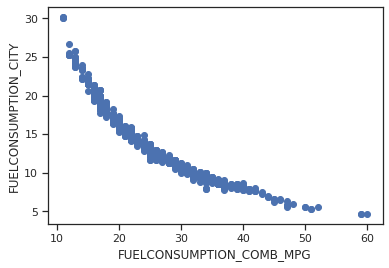

In [ ]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'], df['FUELCONSUMPTION_CITY'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.show()

### Kernel lineal

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

estimator=svm.SVR(kernel='linear', gamma='auto')
estimator.fit(X_train, y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = estimator.predict(X_test)

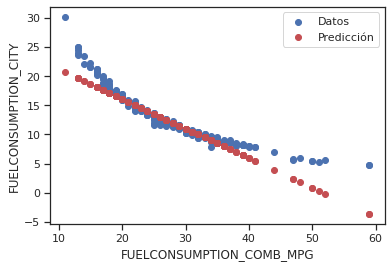

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train:  0.8698299520136046
R2_test: 0.8364795427307106


### Kernel rbf

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

estimator=svm.SVR(kernel='rbf', gamma='auto')
estimator.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = estimator.predict(X_test)

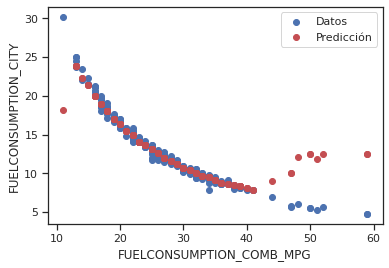

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train:', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train: 0.9416935919033156
R2_test: 0.8727758239848733
